In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import sklearn.metrics as metrics

In [ ]:
data = pd.read_csv(r'drive/My Drive/Colab Notebooks/data_with_english_sentiment_aspect_copy_final.csv')

In [ ]:
data.rename(columns = {'Aspect':'Trend'}, inplace = True)

In [ ]:
data

,Property Name,Review Rating,Review Title,Review Text,Location,Food,Staff,Experience/Value,Service,Room,Trend,Sentiment Score,Sentiment,Sentiments
0,Corinthia Hotel London,5,by far my best hotel in the world,i had a pleasure of staying in this hotel for ...,0,0,0,1,0,0,Experience/Value,0.252,2,pos
1,Corinthia Hotel London,5,by far my best hotel in the world,this hotel wa perfect in every way,0,0,0,1,0,0,Experience/Value,0.381,2,pos
2,Corinthia Hotel London,5,by far my best hotel in the world,communication with the hotel before staying wa...,0,0,1,0,0,0,Staff,0.236,2,pos
3,Corinthia Hotel London,5,by far my best hotel in the world,checking in wa a breeze,0,0,0,0,0,1,Room,0.000,1,neu
4,Corinthia Hotel London,5,by far my best hotel in the world,you go through the spectacular lobby with mode...,0,0,0,0,0,1,Room,0.064,2,pos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182769,The Rembrandt,4,excellent hotel in outstanding location,an excellent breakfast is served in the hotel ...,0,1,0,0,0,0,Food,0.316,2,pos
182770,The Rembrandt,4,excellent hotel in outstanding location,an excellent hotel for london tourist,1,0,0,0,0,0,Location,0.425,2,pos
182771,The Savoy,5,great a always,i have been staying in london hotel for year n...,0,0,0,1,0,0,Experience/Value,0.000,1,neu
182772,The Savoy,5,great a always,i watched the to programme on the setting up o...,0,1,0,0,0,0,Food,0.000,1,neu


In [ ]:
from sklearn import preprocessing, model_selection, naive_bayes
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import string
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Embedding, LSTM,Input,Reshape,Flatten
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
x_tokenized = [sentence.split() for sentence in data["Review Text"]]

In [ ]:
tokens= []
for i in range(len(x_tokenized)):
    for word in x_tokenized[i]:
        tokens.append(word)
vocab = len(set(tokens))

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_tokenized)
sequences = tokenizer.texts_to_sequences(x_tokenized)
xInput = pad_sequences(sequences,maxlen=30,padding='post')


In [ ]:
encoder = preprocessing.LabelEncoder()
y = encoder.fit_transform( data["Trend"])
from tensorflow.keras.utils import to_categorical
y = to_categorical( y, 6, dtype='int')

In [ ]:
y.shape

(182774, 6)

In [ ]:
xInput.shape

(182774, 30)

In [ ]:
vocab_size = len(tokenizer.word_index)+1

In [ ]:
from keras.layers import Dropout
from keras.regularizers import l2


In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length = 30))
model.add(LSTM(100, return_sequences = True))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
#model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(6, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 100)           2491400   
                                                                 
 lstm (LSTM)                 (None, 30, 100)           80400     
                                                                 
 dropout (Dropout)           (None, 30, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 100)               10100     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0

In [ ]:
import tensorflow as tf
tf.config.experimental_run_functions_eagerly(True)

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [ ]:
opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss = 'categorical_crossentropy', optimizer=opt, metrics = ['accuracy'])

In [ ]:
model2 = Sequential()
model2.add(Embedding(vocab_size, 100, input_length = 30))
model2.add(LSTM(100, return_sequences = True))
model2.add(Dropout(0.3))
model2.add(LSTM(100))
model2.add(Dropout(0.3))
#model.add(Flatten())
model2.add(Dense(100, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(50, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(3, activation='softmax'))

In [ ]:
opt=tf.keras.optimizers.Adam(learning_rate=0.01)
model2.compile(loss = 'categorical_crossentropy', optimizer=opt, metrics = ['accuracy'])

In [ ]:
encoder = preprocessing.LabelEncoder()
y2 = encoder.fit_transform( data["Sentiment"])
from tensorflow.keras.utils import to_categorical
y2 = to_categorical( y2, 3, dtype='int')

In [ ]:
history2 = model2.fit(xInput, y2, batch_size=64, epochs=10, shuffle=True, validation_split=0.3)
# history1 = model.fit(xInput, y, batch_size=64, epochs=70, shuffle=True, validation_split=0.3)

Epoch 1/10
   3/2000 [..............................] - ETA: 1:17 - loss: 0.8122 - accuracy: 0.6458

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


2000/2000 [==============================] - 91s 45ms/step - loss: 0.3768 - accuracy: 0.8732 - val_loss: 0.2191 - val_accuracy: 0.9302
Epoch 2/10
2000/2000 [==============================] - 96s 48ms/step - loss: 0.2241 - accuracy: 0.9294 - val_loss: 0.2097 - val_accuracy: 0.9353
Epoch 3/10
2000/2000 [==============================] - 96s 48ms/step - loss: 0.1974 - accuracy: 0.9377 - val_loss: 0.1878 - val_accuracy: 0.9414
Epoch 4/10
2000/2000 [==============================] - 90s 45ms/step - loss: 0.1869 - accuracy: 0.9443 - val_loss: 0.1793 - val_accuracy: 0.9465
Epoch 5/10
2000/2000 [==============================] - 96s 48ms/step - loss: 0.1791 - accuracy: 0.9472 - val_loss: 0.1842 - val_accuracy: 0.9496
Epoch 6/10
2000/2000 [==============================] - 101s 50ms/step - loss: 0.1768 - accuracy: 0.9483 - val_loss: 0.1740 - val_accuracy: 0.9487
Epoch 7/10
2000/2000 [==============================] - 98s 49ms/step - loss: 0.1768 - accuracy: 0.9479 - val_loss: 0.1795 - val_accur

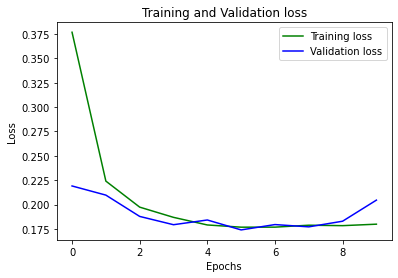

In [ ]:
import matplotlib.pyplot as plt
loss_train = history2.history['loss']
loss_val = history2.history['val_loss']
epochs = range(10)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

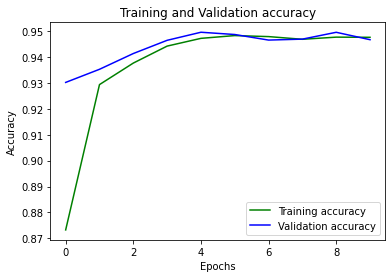

In [ ]:
loss_train = history2.history['accuracy']
loss_val = history2.history['val_accuracy']
epochs = range(10)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model2.save('/content/drive/MyDrive/SaveModel-Sentiment')


INFO:tensorflow:Assets written to: /content/drive/MyDrive/SaveModel-Sentiment/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/SaveModel-Sentiment/assets
